## Top 50 Bestselling Cookbooks

In [117]:
import numpy as np
import pandas as pd

In [118]:
cb_themes = pd.read_csv("top50cookbooks.csv")
cb_themes.head()

,Unnamed: 0,Theme
0,0.0,"food, cuisine"
1,1.0,"time, difficulty, style"
2,2.0,"occasion, personage"
3,3.0,"health, diet"
4,4.0,food group


In [119]:
cb_themes = cb_themes.drop("Unnamed: 0", axis = 1).dropna()
cb_themes

,Theme
0,"food, cuisine"
1,"time, difficulty, style"
2,"occasion, personage"
3,"health, diet"
4,food group
5,"difficulty, health"
6,food
7,community
8,"diet, difficulty, health"
9,cuisine


In [280]:
# Adding data for two more rows because I forgot
new_rows = pd.DataFrame({"Theme":["food", "method, food, difficulty"]})
cb_themes = pd.concat([cb_themes,new_rows], ignore_index = True)

In [311]:
# Finding the list of unique themes
#s = splitted dataframe
s = pd.Series(cb_themes['Theme'].values).str.split(', ', expand = True)


themes = pd.concat([s[0],s[1],s[2]]).unique()

In [312]:
import seaborn as sns

In [331]:
s_stacked = pd.DataFrame(pd.get_dummies(data=s.stack())).groupby(level=0).sum().ne(0).astype(int)
s_matrix = s_stacked.T.dot(s_stacked).astype(float)
#np.fill_diagonal(s_matrix.values, np.nan)
s_matrix

,community,cost,cuisine,demographic,diet,difficulty,food,food group,health,history,ingredient,method,occasion,personage,style,time
community,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
cost,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cuisine,1.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
demographic,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diet,0.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
difficulty,1.0,0.0,0.0,0.0,3.0,18.0,6.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,1.0,3.0
food,0.0,0.0,1.0,0.0,0.0,6.0,16.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
food group,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
health,1.0,2.0,3.0,0.0,3.0,6.0,0.0,1.0,17.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
history,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


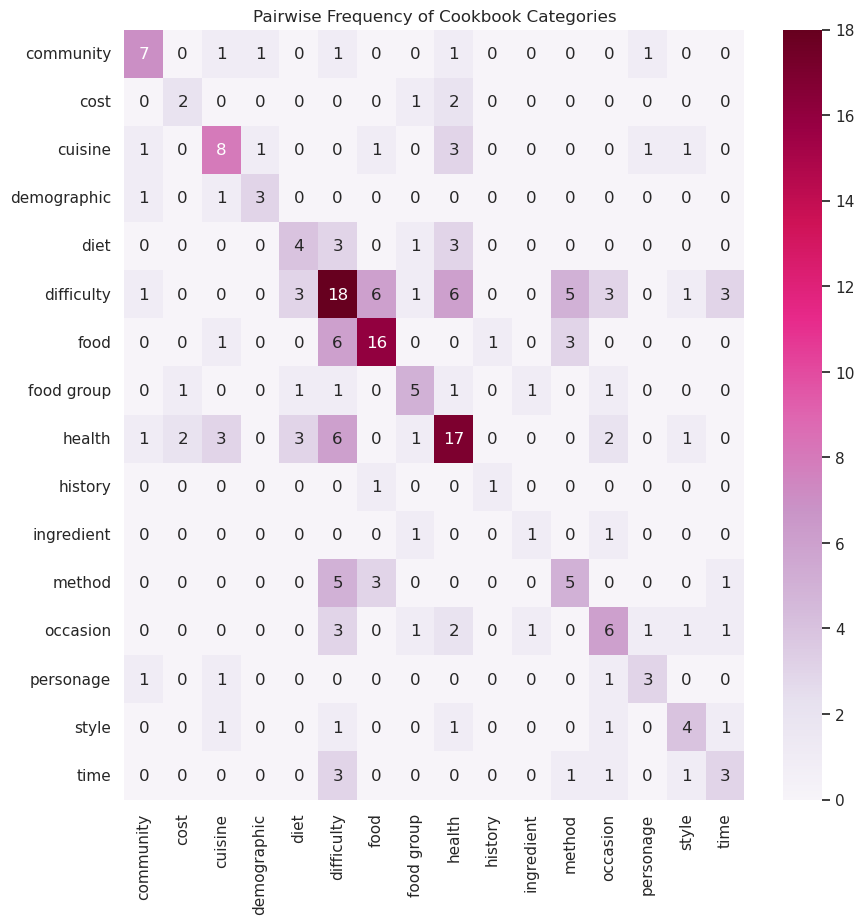

In [333]:
sns.heatmap(s_matrix, cmap = 'PuRd',annot = True).set_title('Pairwise Frequency of Cookbook Categories')
sns.set_theme(rc={'figure.figsize':(8,8)})